In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data= pd.read_csv('housing_price.csv')

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
Y = data['CRIM']

In [5]:
X = data.drop('CRIM', axis=1)

In [6]:
Y

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

In [7]:
X

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [8]:
model = sm.OLS(Y, sm.add_constant(X))
model_fit = model.fit()       

print(model_fit.summary())
print(model_fit.params)
b = []
for i in range(13):
    b.append(model_fit.params[i+1])

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.57e-56
Time:                        23:09:18   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.0

# part (b)

the predictors for which the null hypothesis can be rejected are 'ZN','DIS','RAD','B' and 'MEDV'.

In [9]:
# import seaborn as sns
# sns.pairplot(data)

## part(a)
every predicator has a significant association except 'CHAS'

In [10]:
r = []
for i in range(13):
    A = X.iloc[:,i]
    model = sm.OLS(Y, sm.add_constant(A))
    model_fit = model.fit()       

    print(model_fit.summary())
    
    print(i)
    r.append(model_fit.rsquared)   

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           5.51e-06
Time:                        23:09:19   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537      0.417     10.675      0.0

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
11
                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.17e-19
Time:                        23:09:19   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

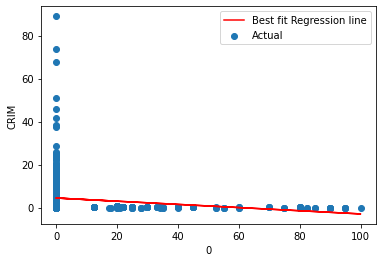

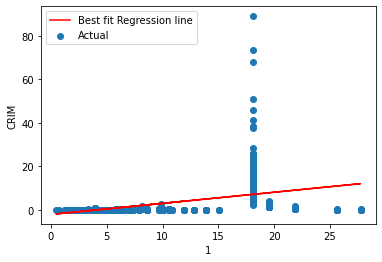

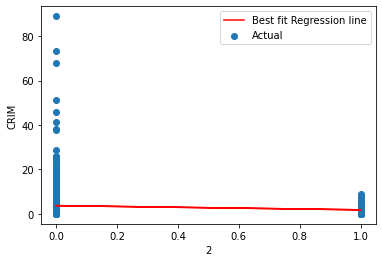

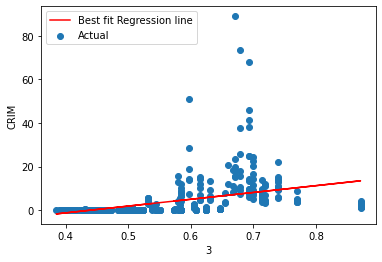

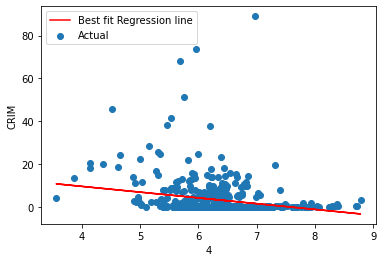

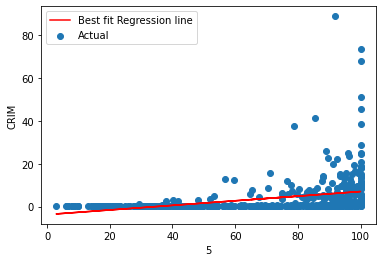

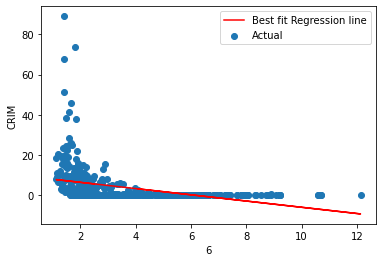

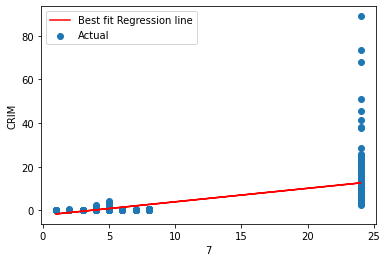

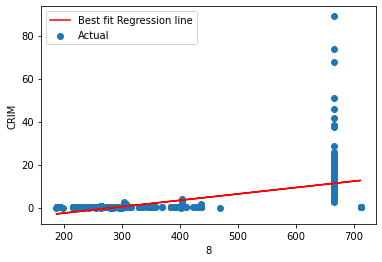

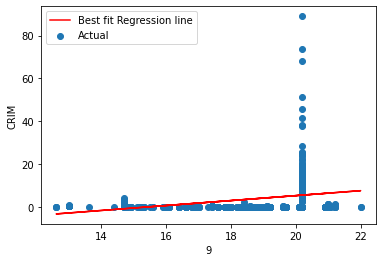

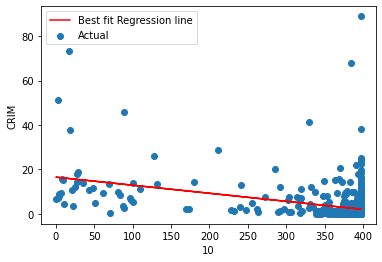

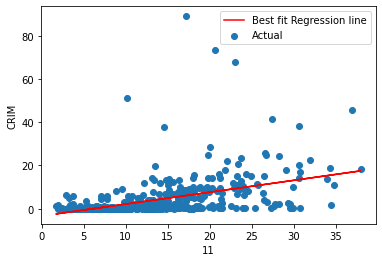

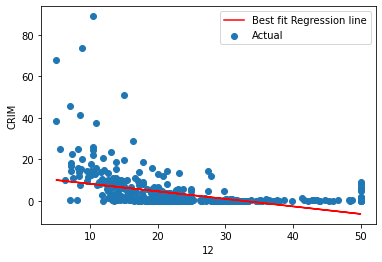

In [11]:
a = []
for i in range(13):
   
    A = X.iloc[:,i]
    from sklearn.linear_model import LinearRegression
    model= LinearRegression()
    y=Y.to_numpy()
    x=A.to_numpy()
    model.fit(x.reshape(-1,1),y)
    y_pred = model.predict(x.reshape(-1,1))
    plt.figure()
    plt.plot(x, y_pred, color='red', label='Best fit Regression line')
    plt.scatter(x,y, label='Actual')
    plt.xlabel(i)
    plt.ylabel('CRIM')
    plt.legend()
    a.append(model.coef_)
   

In [12]:
a

[array([-0.07393498]),
 array([0.50977633]),
 array([-1.89277655]),
 array([31.2485312]),
 array([-2.68405122]),
 array([0.10778623]),
 array([-1.55090168]),
 array([0.61791093]),
 array([0.02974225]),
 array([1.15198279]),
 array([-0.03627964]),
 array([0.54880478]),
 array([-0.36315992])]

In [13]:
arr = np.array(a)

In [14]:
arr1 = arr.flatten()

In [15]:
arr2=np.array(b)

In [16]:
predictors = ['ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [17]:
c = pd.DataFrame({'predictor' :predictors,'simple_reg':arr1, 'multi_reg':arr2})

In [18]:
c

,predictor,simple_reg,multi_reg
0,ZN,-0.073935,0.044855
1,INDUS,0.509776,-0.063855
2,CHAS,-1.892777,-0.749134
3,NOX,31.248531,-10.313535
4,RM,-2.684051,0.430131
5,AGE,0.107786,0.001452
6,DIS,-1.550902,-0.987176
7,RAD,0.617911,0.588209
8,TAX,0.029742,-0.003780
9,PTRATIO,1.151983,-0.271081


## part(c)

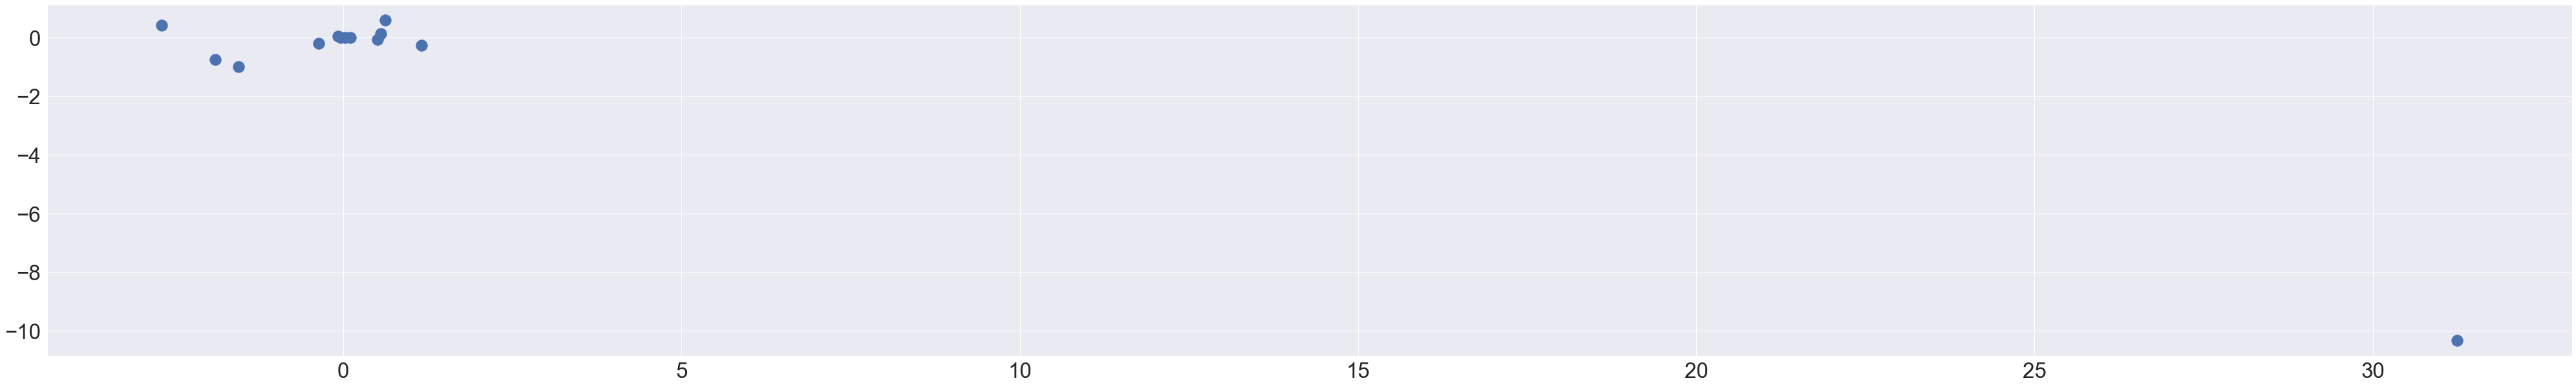

In [19]:
import seaborn as sns
sns.set(font_scale=3)
f = plt.figure()
f.set_figwidth(70)
f.set_figheight(10)
plt.scatter(c['simple_reg'],c['multi_reg'],s=300)
plt.show()

## part(d)

In [20]:
s = []
for i in range(13):
    A = X.iloc[:,i]
    A1=A.to_numpy()
    A2=np.square(A1)
    A3=np.multiply(A1,A2)
    C = pd.DataFrame({'X':A1, 'X_sqrd':A2, 'X_cub': A3})
    model = sm.OLS(Y, sm.add_constant(C))
    model_fit = model.fit()       

    print(model_fit.summary())
    s.append(model_fit.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.28e-06
Time:                        23:09:34   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8461      0.433     11.192      0.0

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     97.80
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           7.34e-50
Time:                        23:09:34   Log-Likelihood:                -1689.9
No. Observations:                 506   AIC:                             3388.
Df Residuals:                     502   BIC:                             3405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [21]:
arr3 = np.array(r)
arr4 = np.array(s)

In [22]:
f = pd.DataFrame({'predictor' :predictors,'simple_reg':arr3, 'poly_reg':arr4})

In [23]:
f

,predictor,simple_reg,poly_reg
0,ZN,0.040188,0.058242
1,INDUS,0.165310,0.259658
2,CHAS,0.003124,0.003124
3,NOX,0.177217,0.296978
4,RM,0.048069,0.067786
5,AGE,0.124421,0.174231
6,DIS,0.144149,0.277825
7,RAD,0.391257,0.400037
8,TAX,0.339614,0.368882
9,PTRATIO,0.084068,0.113782


## it's visible that the r-squared value has significantly improved for all most all the predictors hence there is non-linear association of the response with the predictors